This assignment has 2 main parts:

#### Part 1: Implement k-nearest neighbors (knn) algorithm in either Python (preferred) or Java

To accomplish this:

- In your fit() function, store the train_x and train_y datasets for later use in the predict() function.
- In predict(), implement the knn algorithm. The general idea is, for each point in your dataset, find the k closest points. To do this, 1: calculate the distance between that point and your training points (HERE is where the train_x that you saved in fit() comes in handy!), then 2: find the k closest points (i.e. shortest distance). Once you have the k closest points, get their target values (HERE is where the train_y comes into play!).
- (Still in predict()) Based on those values, generate a prediction for that point. For example, if k=4, if some point A has points W, X, Y, Z as their 4 closest neighbors, and X, Y, Z have survived=1 and W has survived=0, you would predict survived=1 for point A. Return an array containing the predicted value for each point.

#### Part 2: Test your implementation and compare its performance with the sklearn algorithm using the provided Titanic dataset
In a Jupyter notebook, use both your knn algorithm and the sklearn version to predict the "Survived" column in the Titanic dataset. Split the data into train_x, train_y, test_x, and test_y. Use a for loop to provide different values for k, each time fitting with the training data and generating predictions with the testing data. Calculate the accuracy score for each k value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Performing PCA on Titanic Dataset

In [2]:
df.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df = df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
train_y = df.iloc[:,1]

In [5]:
#Cleaning up train_x data. Getting rid of unique data
train_x = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
train_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [6]:
train_x["Sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
train_x["Pclass"].unique()

array([1, 3, 2], dtype=int64)

In [8]:
train_x["Embarked"].unique()

array(['C', 'S', 'Q'], dtype=object)

In [9]:
train_x['Sex'] = np.where(train_x['Sex'] == 'female', 0, 1)

#Female = 0; Male = 1
train_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,C
3,1,1,0,35.0,1,0,53.1000,S
6,0,1,1,54.0,0,0,51.8625,S
10,1,3,0,4.0,1,1,16.7000,S
11,1,1,0,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,S
872,0,1,1,33.0,0,0,5.0000,S
879,1,1,0,56.0,0,1,83.1583,C
887,1,1,0,19.0,0,0,30.0000,S


In [10]:
#convert the values of Embarked Column to numbers using labeling encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_x["Embarked"])

#gives array
train_x["Embarked"] = le.transform(train_x["Embarked"])
train_x



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,2
872,0,1,1,33.0,0,0,5.0000,2
879,1,1,0,56.0,0,1,83.1583,0
887,1,1,0,19.0,0,0,30.0000,2


In [11]:
#c = 0; S = 2, Q = 1

train_x["Embarked"].unique()

array([0, 2, 1])

In [12]:
corr= train_x.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.034542,-0.532418,-0.254085,0.106346,0.023582,0.134241,-0.100943
Pclass,-0.034542,1.000000,-0.046181,-0.306514,-0.103592,0.047496,-0.315235,0.236697
Sex,-0.532418,-0.046181,1.000000,0.184969,-0.104291,-0.089581,-0.130433,0.063291
Age,-0.254085,-0.306514,0.184969,1.000000,-0.156162,-0.271271,-0.092424,-0.087312
SibSp,0.106346,-0.103592,-0.104291,-0.156162,1.000000,0.255346,0.286433,0.038416
Parch,0.023582,0.047496,-0.089581,-0.271271,0.255346,1.000000,0.389740,0.081796
Fare,0.134241,-0.315235,-0.130433,-0.092424,0.286433,0.389740,1.000000,-0.242705
Embarked,-0.100943,0.236697,0.063291,-0.087312,0.038416,0.081796,-0.242705,1.000000


In [13]:
# wealth has barely any correlation to survival (there's no wealth discrimination)
# Sex has a stronger correleation to survival (females are more likely to survive than males)

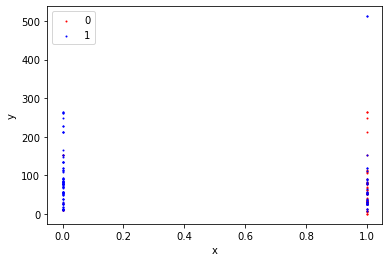

In [14]:
colors = {0: 'red', 1: 'blue'}

#create new df, x, y, and use z coordinate as label
df2 = pd.DataFrame(dict(x=train_x.iloc[:,2], y=train_x.iloc[:,6], label=train_x.iloc[:,0]))

grouped = df2.groupby('label')
fix, ax = plt.subplots()

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], s=1)
    
plt.show()

In [15]:
train_x = train_x.drop(columns=["Survived"])


In [16]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.8, random_state = 3)

In [17]:
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()

In [18]:
test_y.count()

147

In [26]:
#applying sklearn kNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
print("SKLEARN kNN Implementation:")
for num in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_x, train_y)
    hyp_knn = knn.predict(test_x)
    print("Accuracy score when k =",num,":",accuracy_score(test_y, hyp_knn))

SKLEARN kNN Implementation:
Accuracy score when k = 2 : 0.4897959183673469
Accuracy score when k = 3 : 0.6258503401360545
Accuracy score when k = 4 : 0.6326530612244898
Accuracy score when k = 5 : 0.673469387755102
Accuracy score when k = 6 : 0.6122448979591837
Accuracy score when k = 7 : 0.6326530612244898
Accuracy score when k = 8 : 0.6054421768707483
Accuracy score when k = 9 : 0.6122448979591837
Accuracy score when k = 10 : 0.6054421768707483
Accuracy score when k = 11 : 0.6258503401360545
Accuracy score when k = 12 : 0.6326530612244898
Accuracy score when k = 13 : 0.6326530612244898
Accuracy score when k = 14 : 0.6258503401360545
Accuracy score when k = 15 : 0.6530612244897959
Accuracy score when k = 16 : 0.6326530612244898
Accuracy score when k = 17 : 0.6530612244897959
Accuracy score when k = 18 : 0.6530612244897959
Accuracy score when k = 19 : 0.7006802721088435


In [22]:
confusion_matrix(test_y, hyp_knn)

#TN, FP
#FN, TP

array([[21, 26],
       [22, 78]], dtype=int64)

In [27]:
from knn import KNN_SL

for num in range(2, 20):
    knn2 = KNN_SL(n_neighbors = num)
    knn2.fit(train_x, train_y)
    hyp_knn_SL = knn2.predict(test_x)
    print("Accuracy score when k =",num,":",accuracy_score(test_y, hyp_knn_SL))

Accuracy score when k = 2 : 0.6258503401360545
Accuracy score when k = 3 : 0.6258503401360545
Accuracy score when k = 4 : 0.6462585034013606
Accuracy score when k = 5 : 0.673469387755102
Accuracy score when k = 6 : 0.6870748299319728
Accuracy score when k = 7 : 0.6326530612244898
Accuracy score when k = 8 : 0.6802721088435374
Accuracy score when k = 9 : 0.6122448979591837
Accuracy score when k = 10 : 0.6190476190476191
Accuracy score when k = 11 : 0.6258503401360545
Accuracy score when k = 12 : 0.6258503401360545
Accuracy score when k = 13 : 0.6326530612244898
Accuracy score when k = 14 : 0.6462585034013606
Accuracy score when k = 15 : 0.6530612244897959
Accuracy score when k = 16 : 0.6666666666666666
Accuracy score when k = 17 : 0.6530612244897959
Accuracy score when k = 18 : 0.7278911564625851
Accuracy score when k = 19 : 0.7006802721088435


In [25]:
confusion_matrix(test_y, hyp_knn_SL)

#TN, FP
#FN, TP

array([[21, 26],
       [22, 78]], dtype=int64)